In [1]:
#Run this cell
#Importing necessary libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import json
ans=[None]*5

In [3]:
#Import the dataset and define the feature as well as the target datasets / columns 
df = pd.read_csv('zoo.csv')

#We drop the animal names since this is not a good feature to split the data on  
new_df = df.drop("animal_name", axis='columns')
features = list(new_df.columns)[:-1]
target = list(new_df.columns)[-1]

print("Features:", features)
print("Target:", target)

Features: ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'tail', 'domestic', 'catsize']
Target: class_type


In [4]:
#Write a function to find the entropy on a split "target_col"
#def entropy(target_col):
def entropy(target_col, df = new_df):
  vcs = df[target_col].value_counts(normalize=True)
  entropy = 0.0
  for key, prob in vcs.items():
    entropy += (-1) * prob * np.log2(prob) 
  return entropy

In [5]:
#Find the entropy of all the features in the dataset
#Save all the feature names in an array "feature names"
feature_names=['hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone', 
               'breathes','venomous','fins','legs','tail','domestic','catsize']

print("Feature Entropies: ")
for feature in feature_names:
  feature_entropy_print_text = '{:>12}  {:>1}  {:>12}'.format(feature, '=', entropy(feature))
  print(feature_entropy_print_text)

Feature Entropies: 
        hair  =  0.9840304711717018
    feathers  =  0.7179499765002912
        eggs  =  0.9794662187017298
        milk  =  0.9743197211096903
    airborne  =  0.7910662980902585
     aquatic  =  0.9396846718728562
    predator  =  0.9914266810680206
     toothed  =  0.9685867165455516
    backbone  =  0.6761627418829198
    breathes  =  0.7374895672137456
    venomous  =  0.3993820824245975
        fins  =  0.653839880626333
        legs  =  2.0338113440641234
        tail  =  0.8228368841492257
    domestic  =  0.5538976334852962
     catsize  =  0.9880162151534646


In [6]:
#Find the entropy of the feature "toothed"
ans[0] = entropy('toothed')
print(f"Entropy of the feature 'toothed': {ans[0]}")
print(ans[0])

Entropy of the feature 'toothed': 0.9685867165455516
0.9685867165455516


In [7]:
#Write a function to calculate Information Gain on a split attribute and a target column
def InfoGain(data,split_attribute_name,target_name="class"):       
    #Calculate the entropy of the total dataset  
    total_entropy = entropy(target_name, data)
    
    #Calculate the values and the corresponding counts for the split attribute   
    entropies, counts = [],[]
    for d in data[split_attribute_name].unique():
        target_col = list()
        for i in data[split_attribute_name].index:
            if data[split_attribute_name].iloc[i] == d:
                target_col.append(data[target_name].iloc[i])

        target_df = pd.DataFrame(target_col, columns = ['class'])
        counts.append(len(target_col))
        entropies.append(entropy('class', target_df))

    #Calculate the weighted entropy  
    counts_arr = np.array(counts)
    entropies_arr = np.array(entropies)
    weighted_entropy = np.sum(np.multiply(counts, entropies))/np.sum(counts)

    #Calculate the information gain  
    info_gain = total_entropy - weighted_entropy
    return info_gain

In [8]:
#Find the information gain having split attribute "hair" and the target feature name "milk"
ans[1]=InfoGain(new_df, 'hair', 'milk')
print(f"Information gain having split attribute 'hair' and the target feature name 'milk': {ans[1]}")
print(ans[1])

Information gain having split attribute 'hair' and the target feature name 'milk': 0.6599660577558697
0.6599660577558697


In [9]:
#Find the Info gain having "milk" as the split attribute and all the other features as target features one at a time
print('{:>12}  {:>9}  {:>12}'.format('Split Attribute', 'Target', 'Information Gain'))
for ftr in feature_names:
  if ftr == 'milk':
    continue
  info_gain_print_text = '{:>12}  {:>12}  {:>12}'.format('milk', ftr, InfoGain(new_df, 'milk', ftr))
  print(info_gain_print_text)

Split Attribute     Target  Information Gain
        milk          hair  0.6599660577558699
        milk      feathers  0.17242769884415887
        milk          eggs  0.7870598185734242
        milk      airborne  0.11370352314621812
        milk       aquatic  0.10181386403185944
        milk      predator  0.0006367772440212249
        milk       toothed  0.3465412540071714
        milk      backbone  0.15262359382508262
        milk      breathes  0.18259765312929555
        milk      venomous  0.06284178150207942
        milk          fins  0.018672543666944486
        milk          legs  0.36709133269262484
        milk          tail  0.03350320459269063
        milk      domestic  0.019010135775093362
        milk       catsize  0.2509271768405701


In [10]:
#Import Decision Tree Classifier from sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

#Split the given data into 80 percent training data and 20 percent testing data
# dataset_size = len(new_df)
# X = new_df[:dataset_size]
# y = new_df[dataset_size:]
X = new_df[feature_names] # Features
y = new_df[target] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, shuffle=True)

In [11]:
print(f"Size of train set: {len(X_train)} and size of test set is {len(X_test)}")

Size of train set: 80 and size of test set is 21


In [12]:
#Fit the given data

# Create Decision Tree classifer object
tree = DecisionTreeClassifier(criterion = 'entropy')

# Train Decision Tree Classifer
tree = tree.fit(X_train,y_train)

In [13]:
#Make a prediction on the test data and return the percentage of accuracy
from sklearn import metrics

y_pred = tree.predict(X_test)
ans[2] = metrics.accuracy_score(y_test, y_pred)
print(f"Test accuracy: {ans[2]}")
print(ans[2])

Test accuracy: 0.9523809523809523
0.9523809523809523


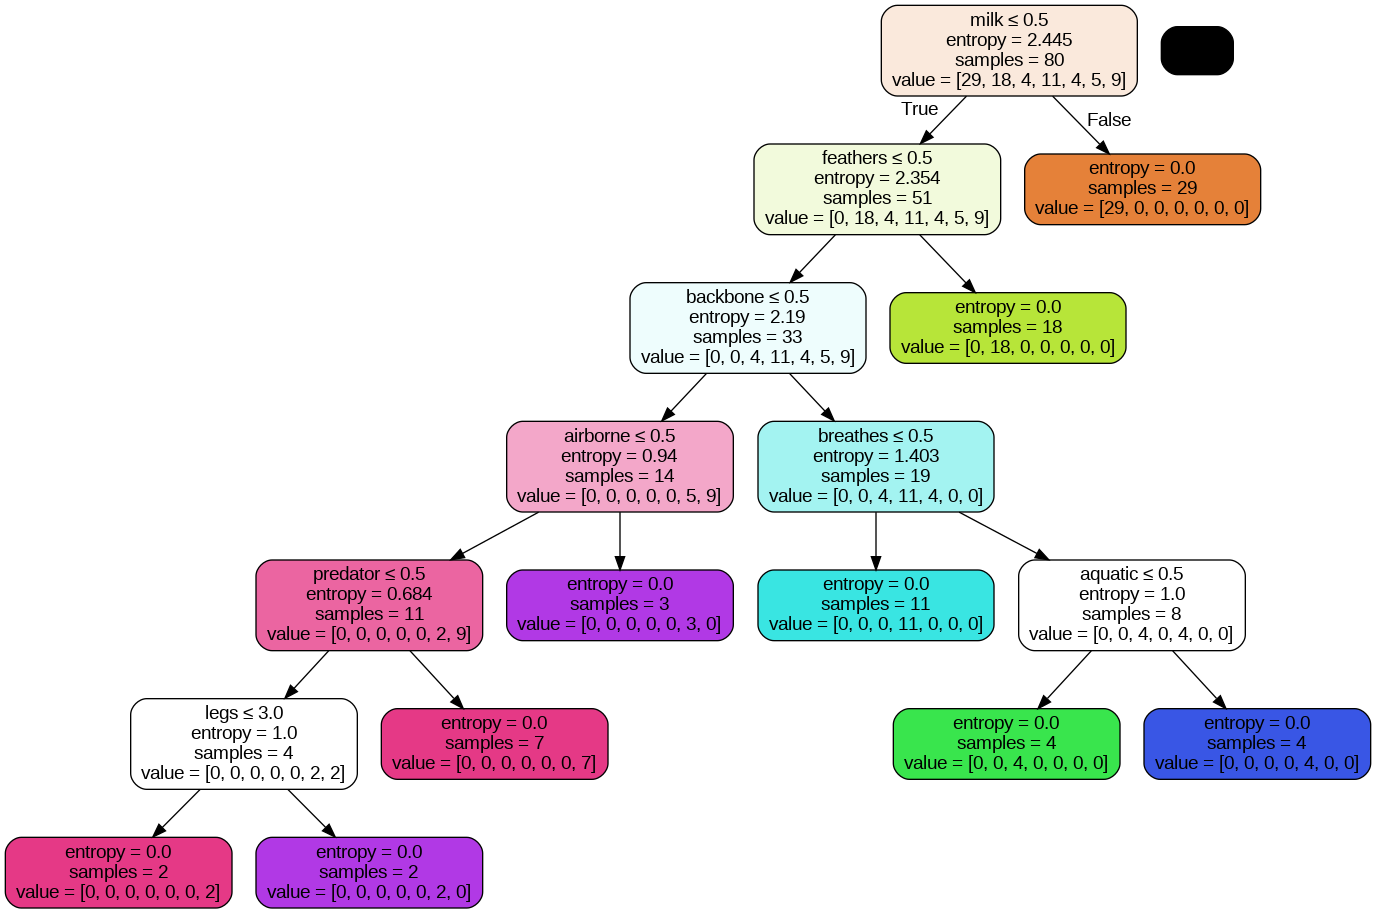

In [14]:
#Run this cell to visualize the decision tree
# from sklearn.externals.six import StringIO  
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=feature_names,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [20]:
#Use sklearn to make a classification report and a confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
cr = classification_report(y_test, y_pred, target_names=['class_type '+str(i) for i in set(y_test)], zero_division = 0)
cm = confusion_matrix(y_test, y_pred)
print(cr)
print(cm)
cr = classification_report(y_test, y_pred, target_names=['class_type '+str(i) for i in set(y_test)], output_dict=True, zero_division = 0)

              precision    recall  f1-score   support

class_type 1       1.00      1.00      1.00        12
class_type 2       1.00      1.00      1.00         2
class_type 3       0.00      0.00      0.00         1
class_type 4       0.67      1.00      0.80         2
class_type 6       1.00      1.00      1.00         3
class_type 7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21

[[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  0  1  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]


In [21]:
#Find the recall,f1-score for class type '3'
ans[3] = cr['class_type 3']['recall'], cr['class_type 3']['f1-score']
print(f"Recall   for class type '3': {ans[3][0]}")
print(f"F1-Score for class type '3': {ans[3][1]}")
print(ans[3])

Recall   for class type '3': 0.0
F1-Score for class type '3': 0.0
(0.0, 0.0)


In [22]:
#Calculate Mean Absolute Error,Mean Squared Error and Root Mean Squared Error
import math
mae = np.mean([abs(y_pred[i] - list(y_test)[i]) for i in range(len(y_test))])
mse = np.mean([(y_pred[i] - list(y_test)[i])**2 for i in range(len(y_test))])
rmse = math.sqrt(mse)

In [23]:
#Find the mean absolute error and root mean square error, save then in a list [mae,rmse]
ans[4] = [mae, rmse]

print(f"Mean absolute error: {ans[4][0]}")
print(f"Root mean square error: {ans[4][1]}")
print(ans[4])

Mean absolute error: 0.047619047619047616
Root mean square error: 0.21821789023599236
[0.047619047619047616, 0.21821789023599236]


In [24]:
ans = [item for item in ans]
with open('ans.json', 'w') as f:
    json.dump(ans, f)
! ~/submit

/bin/bash: /root/submit: No such file or directory
